In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data.csv',index_col=0)

In [3]:
data.head()

,infected
date,
2020-01-20,291
2020-01-21,440
2020-01-22,571
2020-01-23,830
2020-01-24,1287


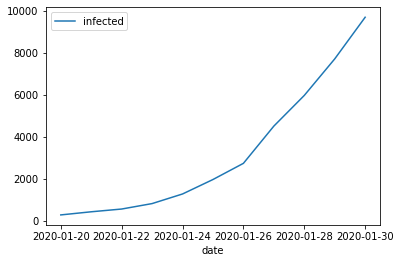

In [4]:
data.plot()

In [5]:
from pyramid.arima import auto_arima

In [6]:
stepwise_model = auto_arima(data, m=12,
                           start_P=0, seasonal=False,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 

Fit ARIMA: order=(2, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0); AIC=133.934, BIC=134.328, Fit time=0.016 seconds
Fit ARIMA: order=(1, 2, 0); AIC=132.938, BIC=133.530, Fit time=0.196 seconds
Fit ARIMA: order=(0, 2, 1); AIC=130.806, BIC=131.398, Fit time=0.155 seconds
Fit ARIMA: order=(1, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=132.640, BIC=133.429, Fit time=0.394 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.803 seconds


In [7]:
stepwise_model.aic()

130.80627723283698

In [8]:
data

,infected
date,
2020-01-20,291
2020-01-21,440
2020-01-22,571
2020-01-23,830
2020-01-24,1287
2020-01-25,1975
2020-01-26,2744
2020-01-27,4515
2020-01-28,5974


In [9]:
stepwise_model.fit(data)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [10]:
predicted_days = 60

In [11]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [12]:
import datetime

In [13]:
for x in range (0, predicted_days):
    print(str(datetime.datetime(2020,2,1) + datetime.timedelta(days = x)) + " - " +str(int(future_forecast[x])))

2020-02-01 00:00:00 - 11889
2020-02-02 00:00:00 - 14315
2020-02-03 00:00:00 - 16970
2020-02-04 00:00:00 - 19853
2020-02-05 00:00:00 - 22966
2020-02-06 00:00:00 - 26307
2020-02-07 00:00:00 - 29877
2020-02-08 00:00:00 - 33676
2020-02-09 00:00:00 - 37704
2020-02-10 00:00:00 - 41961
2020-02-11 00:00:00 - 46446
2020-02-12 00:00:00 - 51160
2020-02-13 00:00:00 - 56103
2020-02-14 00:00:00 - 61275
2020-02-15 00:00:00 - 66675
2020-02-16 00:00:00 - 72305
2020-02-17 00:00:00 - 78163
2020-02-18 00:00:00 - 84250
2020-02-19 00:00:00 - 90566
2020-02-20 00:00:00 - 97110
2020-02-21 00:00:00 - 103884
2020-02-22 00:00:00 - 110886
2020-02-23 00:00:00 - 118117
2020-02-24 00:00:00 - 125577
2020-02-25 00:00:00 - 133265
2020-02-26 00:00:00 - 141183
2020-02-27 00:00:00 - 149329
2020-02-28 00:00:00 - 157704
2020-02-29 00:00:00 - 166308
2020-03-01 00:00:00 - 175140
2020-03-02 00:00:00 - 184202
2020-03-03 00:00:00 - 193492
2020-03-04 00:00:00 - 203011
2020-03-05 00:00:00 - 212759
2020-03-06 00:00:00 - 222736
2020-